# AVERAGE ANNUAL SALARY PREDICTION IN HONGKONG

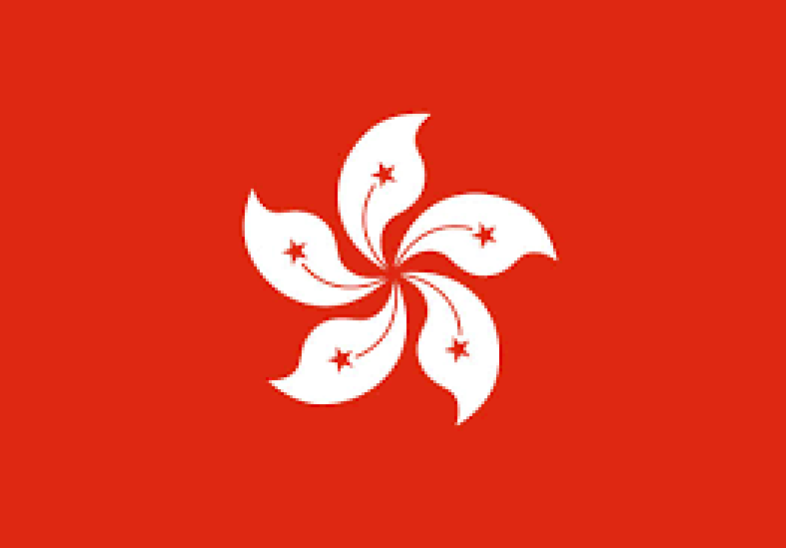

### INTRODUCTION


### Project Objective

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime as dt
import statsmodels.api as sm



In [15]:
df=pd.read_csv('Salary Data.csv')


In [16]:
df.head(180)

,Academic Year,Level of Study,Broad Academic Programme Category,Average Annual Salary (HK$'000)
0,2009/10,Sub-degree,"Medicine, Dentistry and Health",292
1,2009/10,Sub-degree,Sciences,125
2,2009/10,Sub-degree,Engineering and Technology,125
3,2009/10,Sub-degree,Business and Management,139
4,2009/10,Sub-degree,Social Sciences,163
...,...,...,...,...
175,2015/16,Undergraduate,Arts and Humanities,189
176,2015/16,Undergraduate,Education,277
177,2015/16,Taught Postgraduate,"Medicine, Dentistry and Health",313
178,2015/16,Taught Postgraduate,Sciences,306


In [17]:
df['Level of Study']

0                 Sub-degree
1                 Sub-degree
2                 Sub-degree
3                 Sub-degree
4                 Sub-degree
               ...          
313    Research Postgraduate
314    Research Postgraduate
315    Research Postgraduate
316    Research Postgraduate
317    Research Postgraduate
Name: Level of Study, Length: 318, dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Academic Year                      318 non-null    object
 1   Level of Study                     318 non-null    object
 2   Broad Academic Programme Category  318 non-null    object
 3   Average Annual Salary (HK$'000)    318 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.1+ KB


In [19]:
df.describe()

,Average Annual Salary (HK$'000)
count,318.000000
mean,271.783019
std,93.349823
min,120.000000
25%,196.000000
50%,255.500000
75%,339.750000
max,577.000000


###  Data Cleaning

In [20]:
df.isna().sum()

Academic Year                        0
Level of Study                       0
Broad Academic Programme Category    0
Average Annual Salary (HK$'000)      0
dtype: int64

In [21]:
df=df.rename({"Academic Year":"Academic_Year","Level of Study":"Level_of_Study",
              "Broad Academic Programme Category":"Broad_Academic_Programme_Category",
              "Average Annual Salary (HK$'000)": "Average_Annual_Salary"},axis=1)
df.head()

,Academic_Year,Level_of_Study,Broad_Academic_Programme_Category,Average_Annual_Salary
0,2009/10,Sub-degree,"Medicine, Dentistry and Health",292
1,2009/10,Sub-degree,Sciences,125
2,2009/10,Sub-degree,Engineering and Technology,125
3,2009/10,Sub-degree,Business and Management,139
4,2009/10,Sub-degree,Social Sciences,163


### Data Transformation

In [22]:
df

,Academic_Year,Level_of_Study,Broad_Academic_Programme_Category,Average_Annual_Salary
0,2009/10,Sub-degree,"Medicine, Dentistry and Health",292
1,2009/10,Sub-degree,Sciences,125
2,2009/10,Sub-degree,Engineering and Technology,125
3,2009/10,Sub-degree,Business and Management,139
4,2009/10,Sub-degree,Social Sciences,163
...,...,...,...,...
313,2020/21,Research Postgraduate,Engineering and Technology,415
314,2020/21,Research Postgraduate,Business and Management,479
315,2020/21,Research Postgraduate,Social Sciences,329
316,2020/21,Research Postgraduate,Arts and Humanities,379


In [23]:
# Create a new columns called converted year
df['converted'] = df['Academic_Year'].str.replace(r'/', '')
# Extract the first 4 digits from converted year field to represent year
df['year'] = df.converted.astype(str).str[:4].astype(int)
# Extract the last two digits from converted year field
df['day'] = df.converted.astype(str).str[-2:].astype(int)
# Now drop two fields Academic_year and converted
df=df.drop(['Academic_Year','converted'],axis=1)
df

,Level_of_Study,Broad_Academic_Programme_Category,Average_Annual_Salary,year,day
0,Sub-degree,"Medicine, Dentistry and Health",292,2009,10
1,Sub-degree,Sciences,125,2009,10
2,Sub-degree,Engineering and Technology,125,2009,10
3,Sub-degree,Business and Management,139,2009,10
4,Sub-degree,Social Sciences,163,2009,10
...,...,...,...,...,...
313,Research Postgraduate,Engineering and Technology,415,2020,21
314,Research Postgraduate,Business and Management,479,2020,21
315,Research Postgraduate,Social Sciences,329,2020,21
316,Research Postgraduate,Arts and Humanities,379,2020,21


In [24]:
df.head(2)

,Level_of_Study,Broad_Academic_Programme_Category,Average_Annual_Salary,year,day
0,Sub-degree,"Medicine, Dentistry and Health",292,2009,10
1,Sub-degree,Sciences,125,2009,10


In [25]:
print("Number of sub-Categories in: ")
for ColName in df[['Level_of_Study','Broad_Academic_Programme_Category']]:
    print("{} = {}".format(ColName,len(df[ColName].unique())))

Number of sub-Categories in: 
Level_of_Study = 4
Broad_Academic_Programme_Category = 7


In [26]:
print("Number of sub-Categories in: ")
for ColName in df[['Level_of_Study','Broad_Academic_Programme_Category']]:
    print("{} = {}".format(ColName,(df[ColName].unique())))

Number of sub-Categories in: 
Level_of_Study = ['Sub-degree' 'Undergraduate' 'Taught Postgraduate'
 'Research Postgraduate']
Broad_Academic_Programme_Category = ['Medicine, Dentistry and Health' 'Sciences' 'Engineering and Technology'
 'Business and Management' 'Social Sciences' 'Arts and Humanities'
 'Education']


In [27]:
Level_of_Study = pd.get_dummies(df['Level_of_Study'], drop_first=True) 
Broad_Academic_Programme_Category=pd.get_dummies(df['Broad_Academic_Programme_Category'],drop_first=True)


In [28]:
df = pd.concat([df,Level_of_Study,Broad_Academic_Programme_Category], axis=1)

In [29]:
df

,Level_of_Study,Broad_Academic_Programme_Category,Average_Annual_Salary,year,day,Sub-degree,Taught Postgraduate,Undergraduate,Business and Management,Education,Engineering and Technology,"Medicine, Dentistry and Health",Sciences,Social Sciences
0,Sub-degree,"Medicine, Dentistry and Health",292,2009,10,1,0,0,0,0,0,1,0,0
1,Sub-degree,Sciences,125,2009,10,1,0,0,0,0,0,0,1,0
2,Sub-degree,Engineering and Technology,125,2009,10,1,0,0,0,0,1,0,0,0
3,Sub-degree,Business and Management,139,2009,10,1,0,0,1,0,0,0,0,0
4,Sub-degree,Social Sciences,163,2009,10,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,Research Postgraduate,Engineering and Technology,415,2020,21,0,0,0,0,0,1,0,0,0
314,Research Postgraduate,Business and Management,479,2020,21,0,0,0,1,0,0,0,0,0
315,Research Postgraduate,Social Sciences,329,2020,21,0,0,0,0,0,0,0,0,1
316,Research Postgraduate,Arts and Humanities,379,2020,21,0,0,0,0,0,0,0,0,0


In [30]:
# Drop two features because we have already obtained dummy variables from them
df=df.drop(['Level_of_Study','Broad_Academic_Programme_Category'],axis=1)
df

,Average_Annual_Salary,year,day,Sub-degree,Taught Postgraduate,Undergraduate,Business and Management,Education,Engineering and Technology,"Medicine, Dentistry and Health",Sciences,Social Sciences
0,292,2009,10,1,0,0,0,0,0,1,0,0
1,125,2009,10,1,0,0,0,0,0,0,1,0
2,125,2009,10,1,0,0,0,0,1,0,0,0
3,139,2009,10,1,0,0,1,0,0,0,0,0
4,163,2009,10,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
313,415,2020,21,0,0,0,0,0,1,0,0,0
314,479,2020,21,0,0,0,1,0,0,0,0,0
315,329,2020,21,0,0,0,0,0,0,0,0,1
316,379,2020,21,0,0,0,0,0,0,0,0,0


In [31]:
# Test for multicolinearity,but first drop target variable
X=df.iloc[:,1:13] # here the target variable is dropped
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) 
for i in range (len(X.columns))]
print(vif_data)

                          features        VIF
0                             year  30.719020
1                              day  21.401065
2                       Sub-degree   1.459014
3              Taught Postgraduate   1.462409
4                    Undergraduate   1.471698
5          Business and Management   1.585958
6                        Education   1.698113
7       Engineering and Technology   1.698113
8   Medicine, Dentistry and Health   1.622859
9                         Sciences   1.698113
10                 Social Sciences   1.698113


In [32]:
# Test for multicollinearity after obtaining dummy variables


<AxesSubplot:>

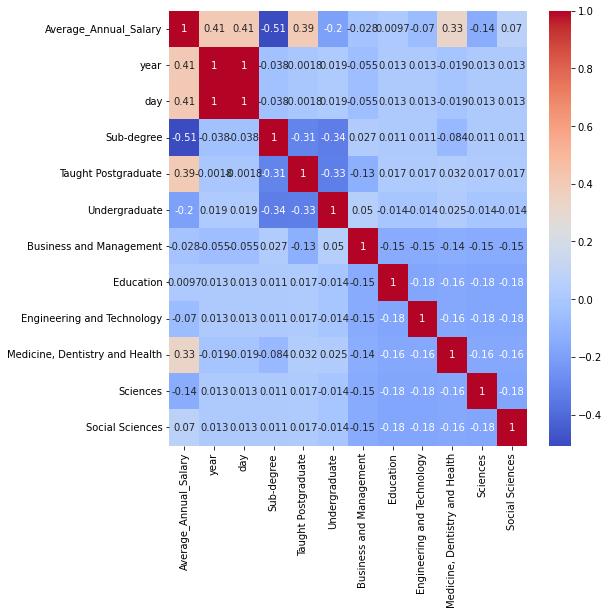

In [33]:
# Now lets decide between year and day features which one to drop
# Create a heatmap for better visualization
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [34]:
df=df.drop(['day'],axis=1)

In [35]:
df

,Average_Annual_Salary,year,Sub-degree,Taught Postgraduate,Undergraduate,Business and Management,Education,Engineering and Technology,"Medicine, Dentistry and Health",Sciences,Social Sciences
0,292,2009,1,0,0,0,0,0,1,0,0
1,125,2009,1,0,0,0,0,0,0,1,0
2,125,2009,1,0,0,0,0,1,0,0,0
3,139,2009,1,0,0,1,0,0,0,0,0
4,163,2009,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
313,415,2020,0,0,0,0,0,1,0,0,0
314,479,2020,0,0,0,1,0,0,0,0,0
315,329,2020,0,0,0,0,0,0,0,0,1
316,379,2020,0,0,0,0,0,0,0,0,0


In [36]:
X=df.iloc[:,1:13]
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) 
for i in range (len(X.columns))]
print(vif_data)

                         features       VIF
0                            year  9.529732
1                      Sub-degree  1.914097
2             Taught Postgraduate  1.905054
3                   Undergraduate  1.999989
4         Business and Management  1.789958
5                       Education  1.999981
6      Engineering and Technology  1.999981
7  Medicine, Dentistry and Health  1.861688
8                        Sciences  1.999981
9                 Social Sciences  1.999981


In [37]:
y=df.iloc[:,0]
X=df.iloc[:,1:13]

In [38]:
X

,year,Sub-degree,Taught Postgraduate,Undergraduate,Business and Management,Education,Engineering and Technology,"Medicine, Dentistry and Health",Sciences,Social Sciences
0,2009,1,0,0,0,0,0,1,0,0
1,2009,1,0,0,0,0,0,0,1,0
2,2009,1,0,0,0,0,1,0,0,0
3,2009,1,0,0,1,0,0,0,0,0
4,2009,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
313,2020,0,0,0,0,0,1,0,0,0
314,2020,0,0,0,1,0,0,0,0,0
315,2020,0,0,0,0,0,0,0,0,1
316,2020,0,0,0,0,0,0,0,0,0


## Model Builder

### Build The first model

In [39]:
unscaled=X
unscaled = sm.add_constant(unscaled)

# Note the difference in argument order
model = sm.OLS(y, unscaled).fit()
predictions = model.predict(unscaled) # make the predictions by the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Average_Annual_Salary   R-squared:                       0.698
Model:                               OLS   Adj. R-squared:                  0.688
Method:                    Least Squares   F-statistic:                     70.90
Date:                   Wed, 08 Feb 2023   Prob (F-statistic):           9.73e-74
Time:                           21:15:23   Log-Likelihood:                -1703.0
No. Observations:                    318   AIC:                             3428.
Df Residuals:                        307   BIC:                             3469.
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -2.176e+04   1714.550    -12.691      0.000   -2.51e+04   -1.84e+04
year                              10.9423      0.851     12.858      0.000       9.268      12.617
Sub-degree                      -123.2002      8.282    -14.876      0.000    -139.496    -106.904
Taught Postgraduate               21.7317      8.368      2.597      0.010       5.266      38.198
Undergraduate                    -79.0952      8.046     -9.831      0.000     -94.927     -63.263
Business and Management           45.6786     11.484      3.978      0.000      23.081      68.276
Education                         35.8958     10.644      3.373      0.001      14.952      56.839
Engineering and Technology        18.2500     10.644      1.715      0.087      -2.694      39.194
Medicine, Dentistry and Health   107.9390     11.115      9.711      0.000      86.068     129.810
Sciences                           1.8125     10.644      0.170      0.865     -19.131      22.756
Social Sciences                   49.2083     10.644      4.623      0.000      28.265      70.152
==============================================================================
Omnibus:                       13.905   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.763
Skew:                           0.465   Prob(JB):                     0.000623
Kurtosis:                       3.499   Cond. No.                     1.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# Now lets normalize the datasets so as to enable all features have equal chance of contribution
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaled_features=scaling.fit_transform(X)
scaled_features

array([[-1.56423327,  1.78443563, -0.55070744, ...,  2.59924942,
        -0.42163702, -0.42163702],
       [-1.56423327,  1.78443563, -0.55070744, ..., -0.38472645,
         2.37170825, -0.42163702],
       [-1.56423327,  1.78443563, -0.55070744, ..., -0.38472645,
        -0.42163702, -0.42163702],
       ...,
       [ 1.62811678, -0.56040127, -0.55070744, ..., -0.38472645,
        -0.42163702,  2.37170825],
       [ 1.62811678, -0.56040127, -0.55070744, ..., -0.38472645,
        -0.42163702, -0.42163702],
       [ 1.62811678, -0.56040127, -0.55070744, ..., -0.38472645,
        -0.42163702, -0.42163702]])

In [41]:
# After scaling transform back to a dataframe so that the indexes and features names can be retained
scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

In [42]:
X=scaled_features_df
X

,year,Sub-degree,Taught Postgraduate,Undergraduate,Business and Management,Education,Engineering and Technology,"Medicine, Dentistry and Health",Sciences,Social Sciences
0,-1.564233,1.784436,-0.550707,-0.599145,-0.362867,-0.421637,-0.421637,2.599249,-0.421637,-0.421637
1,-1.564233,1.784436,-0.550707,-0.599145,-0.362867,-0.421637,-0.421637,-0.384726,2.371708,-0.421637
2,-1.564233,1.784436,-0.550707,-0.599145,-0.362867,-0.421637,2.371708,-0.384726,-0.421637,-0.421637
3,-1.564233,1.784436,-0.550707,-0.599145,2.755829,-0.421637,-0.421637,-0.384726,-0.421637,-0.421637
4,-1.564233,1.784436,-0.550707,-0.599145,-0.362867,-0.421637,-0.421637,-0.384726,-0.421637,2.371708
...,...,...,...,...,...,...,...,...,...,...
313,1.628117,-0.560401,-0.550707,-0.599145,-0.362867,-0.421637,2.371708,-0.384726,-0.421637,-0.421637
314,1.628117,-0.560401,-0.550707,-0.599145,2.755829,-0.421637,-0.421637,-0.384726,-0.421637,-0.421637
315,1.628117,-0.560401,-0.550707,-0.599145,-0.362867,-0.421637,-0.421637,-0.384726,-0.421637,2.371708
316,1.628117,-0.560401,-0.550707,-0.599145,-0.362867,-0.421637,-0.421637,-0.384726,-0.421637,-0.421637


### Build second model

In [43]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions from the model

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Average_Annual_Salary   R-squared:                       0.698
Model:                               OLS   Adj. R-squared:                  0.688
Method:                    Least Squares   F-statistic:                     70.90
Date:                   Wed, 08 Feb 2023   Prob (F-statistic):           9.73e-74
Time:                           21:15:26   Log-Likelihood:                -1703.0
No. Observations:                    318   AIC:                             3428.
Df Residuals:                        307   BIC:                             3469.
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            271.7830      2.924     92.949      0.000     266.029     277.537
year                              37.7042      2.932     12.858      0.000      31.934      43.474
Sub-degree                       -52.5411      3.532    -14.876      0.000     -59.491     -45.591
Taught Postgraduate                9.1828      3.536      2.597      0.010       2.225      16.141
Undergraduate                    -34.8715      3.547     -9.831      0.000     -41.851     -27.892
Business and Management           14.6467      3.682      3.978      0.000       7.401      21.893
Education                         12.8505      3.810      3.373      0.001       5.353      20.348
Engineering and Technology         6.5334      3.810      1.715      0.087      -0.964      14.031
Medicine, Dentistry and Health    36.1729      3.725      9.711      0.000      28.843      43.503
Sciences                           0.6489      3.810      0.170      0.865      -6.849       8.147
Social Sciences                   17.6163      3.810      4.623      0.000      10.119      25.114
==============================================================================
Omnibus:                       13.905   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.763
Skew:                           0.465   Prob(JB):                     0.000623
Kurtosis:                       3.499   Cond. No.                         2.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Interpretation

#### Model Accuracy

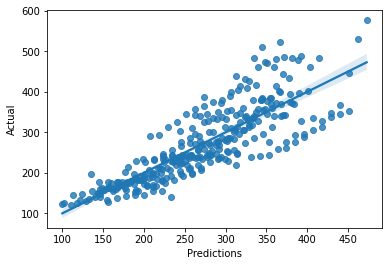

In [38]:
ax = sns.regplot(x=predictions, y=y)
ax.set_xlabel("Predictions", fontsize = 10)
ax.set_ylabel("Actual", fontsize = 10)
plt.show()

## Conclusion/Insights

---

--END--

In [51]:
df.columns

Index(['Academic Year', 'Level of Study', 'Broad Academic Programme Category',
       'Average Annual Salary (HK$'000)'],
      dtype='object')

In [53]:
df.groupby('Broad_Academic_Programme_Category')['Average_Annual_Salary'].count()

Broad_Academic_Programme_Category
Arts and Humanities               48
Business and Management           37
Education                         48
Engineering and Technology        48
Medicine, Dentistry and Health    41
Sciences                          48
Social Sciences                   48
Name: Average_Annual_Salary, dtype: int64

In [54]:
df.groupby('Broad_Academic_Programme_Category')['Average_Annual_Salary'].sum()

Broad_Academic_Programme_Category
Arts and Humanities               11425
Business and Management            9794
Education                         13148
Engineering and Technology        12301
Medicine, Dentistry and Health    14460
Sciences                          11512
Social Sciences                   13787
Name: Average_Annual_Salary, dtype: int64

In [55]:
df.head()

,Academic_Year,Level_of_Study,Broad_Academic_Programme_Category,Average_Annual_Salary
0,2009/10,Sub-degree,"Medicine, Dentistry and Health",292
1,2009/10,Sub-degree,Sciences,125
2,2009/10,Sub-degree,Engineering and Technology,125
3,2009/10,Sub-degree,Business and Management,139
4,2009/10,Sub-degree,Social Sciences,163


In [59]:
df['year']

0      2009
1      2009
2      2009
3      2009
4      2009
       ... 
313    2020
314    2020
315    2020
316    2020
317    2020
Name: year, Length: 318, dtype: int64

In [63]:
f=df['year']==2012



In [64]:
f

0      False
1      False
2      False
3      False
4      False
       ...  
313    False
314    False
315    False
316    False
317    False
Name: year, Length: 318, dtype: bool